In [ ]:
import pandas as pd

In [ ]:

import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:

dataframe = pd.read_csv("/content/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:

print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


In [ ]:
# 0 = Adolecente
# 1 = Adulto
# 2 = Mayor

In [ ]:

print(dataframe.groupby('valor').size())

valor
1       4
2       7
3       7
4       8
5       1
6      15
8       5
9       1
10      1
12     15
15      6
16      4
18      8
20      5
24     16
25      1
27      1
28      6
30      8
32      2
35      3
36      5
40      4
42      2
48      5
54      5
56      1
60      3
63      1
64      3
72      2
80      2
90      1
96      2
100     1
112     1
120     1
144     2
160     1
162     1
168     1
240     1
378     1
dtype: int64


In [ ]:

print(dataframe.groupby('acciones').size())

acciones
1      8
2     24
3     18
4     16
5      8
6     26
7      8
8     11
9      3
10     7
12     9
14     1
15     2
16     3
18     8
20     5
21     1
24     2
25     1
27     1
28     2
30     2
32     1
40     1
56     1
63     1
dtype: int64


In [ ]:

print(dataframe.groupby('paginas').size())

paginas
1    80
2    55
3    11
4    10
5     7
6     4
7     1
9     2
dtype: int64


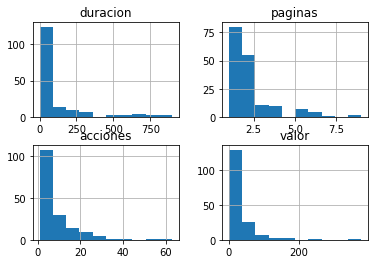

In [ ]:

dataframe.drop(['clase'],1).hist()
plt.show()

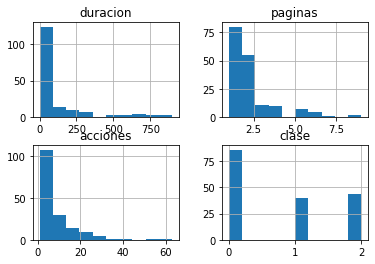

In [ ]:

dataframe.drop(['valor'],1).hist()
plt.show()

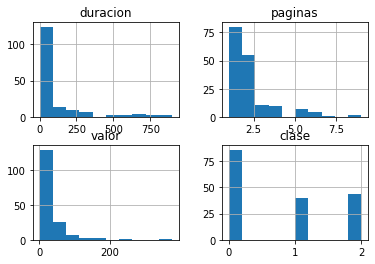

In [ ]:

dataframe.drop(['acciones'],1).hist()
plt.show()

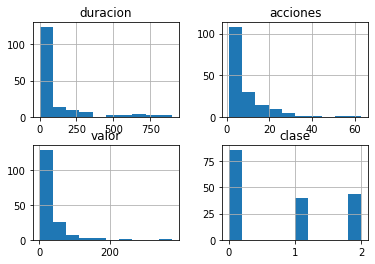

In [ ]:

dataframe.drop(['paginas'],1).hist()
plt.show()

In [ ]:
dataframe.shape

(170, 5)

In [ ]:
dataframe.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


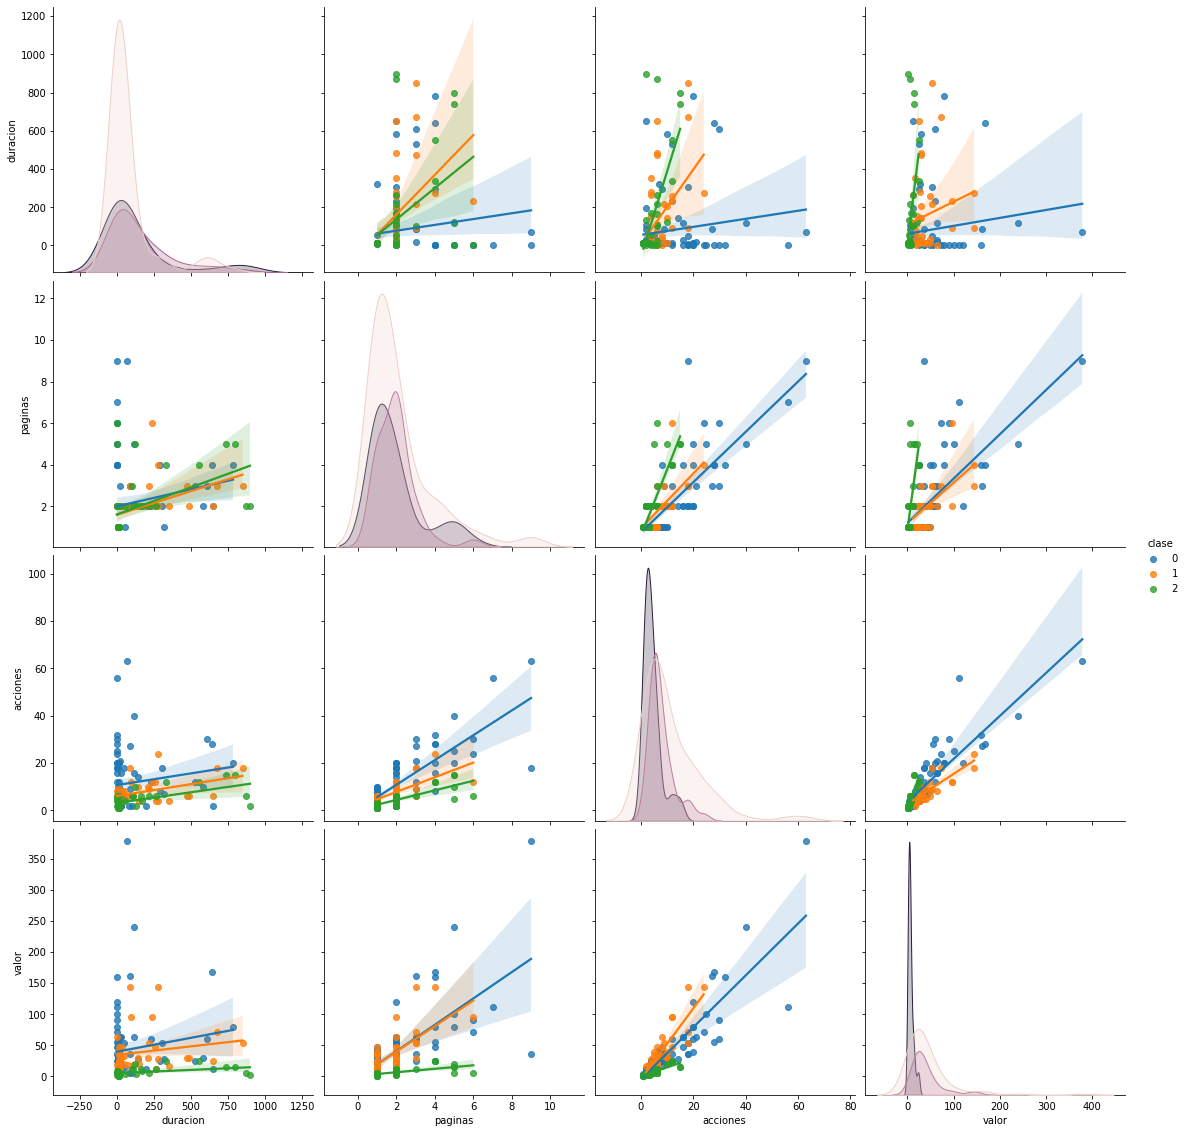

In [ ]:

1
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

In [ ]:
#Modelo

In [ ]:
X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [ ]:
model = linear_model.LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


In [ ]:
model.score(X,y)

0.7823529411764706

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Logistic Regression: 0.728571 (0.094186)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


In [ ]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [ ]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])

In [ ]:
#En base a los datos se sabe que el próximo usuario será adulto

In [ ]:
X_new = pd.DataFrame({'duracion': [60], 'paginas': [60], 'acciones': [60], 'valor': [70]})
model.predict(X_new)

array([2])